#IMPORTING LIBRARIES AND READING DATA

In [13]:
# pip install imblearn

In [14]:
# pip install scikit-optimize

In [15]:
# pip install xgboost

In [16]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Importing modules from scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, roc_auc_score, accuracy_score
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import PredefinedSplit
import xgboost as xgb


# Importing resampling techniques from imbalanced-learn
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler

# Importing hyperparameter tuning tools from scikit-optimize
from skopt import BayesSearchCV
from skopt.space import Real, Integer, Categorical

# Ignoring warnings
import warnings
warnings.filterwarnings('ignore')

In [17]:
# Reading the dataset from the specified file path
df=pd.read_csv("/content/data (2).csv")
df.head()

Bankrupt?   ROA(C) before interest and depreciation before interest  \
0          1                                           0.370594          
1          1                                           0.464291          
2          1                                           0.426071          
3          1                                           0.399844          
4          1                                           0.465022          

    ROA(A) before interest and % after tax  \
0                                 0.424389   
1                                 0.538214   
2                                 0.499019   
3                                 0.451265   
4                                 0.538432   

    ROA(B) before interest and depreciation after tax  \
0                                           0.405750    
1                                           0.516730    
2                                           0.472295    
3                                           0.457733    
4                                           0.522298    

    Operating Gross Margin   Realized Sales Gross Margin  \
0                 0.601457                      0.601457   
1                 0.610235                      0.610235   
2                 0.601450                      0.601364   
3                 0.583541                      0.583541   
4                 0.598783                      0.598783   

    Operating Profit Rate   Pre-tax net Interest Rate  \
0                0.998969                    0.796887   
1                0.998946                    0.797380   
2                0.998857                    0.796403   
3                0.998700                    0.796967   
4                0.998973                    0.797366   

    After-tax net Interest Rate   Non-industry income and expenditure/revenue  \
0                      0.808809                                      0.302646   
1                      0.809301                                      0.303556   
2                      0.808388                                      0.302035   
3                      0.808966                                      0.303350   
4                      0.809304                                      0.303475   

   ...   Net Income to Total Assets   Total assets to GNP price  \
0  ...                     0.716845                    0.009219   
1  ...                     0.795297                    0.008323   
2  ...                     0.774670                    0.040003   
3  ...                     0.739555                    0.003252   
4  ...                     0.795016                    0.003878   

    No-credit Interval   Gross Profit to Sales  \
0             0.622879                0.601453   
1             0.623652                0.610237   
2             0.623841                0.601449   
3             0.622929                0.583538   
4             0.623521                0.598782   

    Net Income to Stockholder's Equity   Liability to Equity  \
0                             0.827890              0.290202   
1                             0.839969              0.283846   
2                             0.836774              0.290189   
3                             0.834697              0.281721   
4                             0.839973              0.278514   

    Degree of Financial Leverage (DFL)  \
0                             0.026601   
1                             0.264577   
2                             0.026555   
3                             0.026697   
4                             0.024752   

    Interest Coverage Ratio (Interest expense to EBIT)   Net Income Flag  \
0                                           0.564050                   1   
1                                           0.570175                   1   
2                                           0.563706                   1   
3                                           0.564663                   1   
4                        

In [18]:
# Printing the columns with NaN (missing) values in the dataset
# This line checks for columns with NaN values, then converts the result to a list and prints it
print(f"Columns with NaN values: {df.columns[df.isna().any()].to_list()}")

# Printing the number of duplicated rows in the dataset
# This line checks for duplicated rows in the dataset, calculates the sum of duplicated rows, and prints it
print(f"# of duplicated rows: {df.duplicated().sum()}")


Columns with NaN values: []
# of duplicated rows: 0


In [19]:
# Renaming the column 'Bankrupt?' to 'target' for clarity
# This line renames the column 'Bankrupt?' to 'target' in the DataFrame inplace
df.rename(columns = {'Bankrupt?':'target'}, inplace = True)

# Displaying the first few rows of the DataFrame after renaming the column
# This line prints the first few rows of the DataFrame to verify the column name change
df.head()


target   ROA(C) before interest and depreciation before interest  \
0       1                                           0.370594          
1       1                                           0.464291          
2       1                                           0.426071          
3       1                                           0.399844          
4       1                                           0.465022          

    ROA(A) before interest and % after tax  \
0                                 0.424389   
1                                 0.538214   
2                                 0.499019   
3                                 0.451265   
4                                 0.538432   

    ROA(B) before interest and depreciation after tax  \
0                                           0.405750    
1                                           0.516730    
2                                           0.472295    
3                                           0.457733    
4                                           0.522298    

    Operating Gross Margin   Realized Sales Gross Margin  \
0                 0.601457                      0.601457   
1                 0.610235                      0.610235   
2                 0.601450                      0.601364   
3                 0.583541                      0.583541   
4                 0.598783                      0.598783   

    Operating Profit Rate   Pre-tax net Interest Rate  \
0                0.998969                    0.796887   
1                0.998946                    0.797380   
2                0.998857                    0.796403   
3                0.998700                    0.796967   
4                0.998973                    0.797366   

    After-tax net Interest Rate   Non-industry income and expenditure/revenue  \
0                      0.808809                                      0.302646   
1                      0.809301                                      0.303556   
2                      0.808388                                      0.302035   
3                      0.808966                                      0.303350   
4                      0.809304                                      0.303475   

   ...   Net Income to Total Assets   Total assets to GNP price  \
0  ...                     0.716845                    0.009219   
1  ...                     0.795297                    0.008323   
2  ...                     0.774670                    0.040003   
3  ...                     0.739555                    0.003252   
4  ...                     0.795016                    0.003878   

    No-credit Interval   Gross Profit to Sales  \
0             0.622879                0.601453   
1             0.623652                0.610237   
2             0.623841                0.601449   
3             0.622929                0.583538   
4             0.623521                0.598782   

    Net Income to Stockholder's Equity   Liability to Equity  \
0                             0.827890              0.290202   
1                             0.839969              0.283846   
2                             0.836774              0.290189   
3                             0.834697              0.281721   
4                             0.839973              0.278514   

    Degree of Financial Leverage (DFL)  \
0                             0.026601   
1                             0.264577   
2                             0.026555   
3                             0.026697   
4                             0.024752   

    Interest Coverage Ratio (Interest expense to EBIT)   Net Income Flag  \
0                                           0.564050                   1   
1                                           0.570175                   1   
2                                           0.563706                   1   
3                                           0.564663                   1   
4                                          

In [20]:
df.columns


Index(['target', ' ROA(C) before interest and depreciation before interest',
       ' ROA(A) before interest and % after tax',
       ' ROA(B) before interest and depreciation after tax',
       ' Operating Gross Margin', ' Realized Sales Gross Margin',
       ' Operating Profit Rate', ' Pre-tax net Interest Rate',
       ' After-tax net Interest Rate',
       ' Non-industry income and expenditure/revenue',
       ' Continuous interest rate (after tax)', ' Operating Expense Rate',
       ' Research and development expense rate', ' Cash flow rate',
       ' Interest-bearing debt interest rate', ' Tax rate (A)',
       ' Net Value Per Share (B)', ' Net Value Per Share (A)',
       ' Net Value Per Share (C)', ' Persistent EPS in the Last Four Seasons',
       ' Cash Flow Per Share', ' Revenue Per Share (Yuan ¥)',
       ' Operating Profit Per Share (Yuan ¥)',
       ' Per Share Net profit before tax (Yuan ¥)',
       ' Realized Sales Gross Profit Growth Rate',
       ' Operating Profit Gr

#FEATURE SELECTION


In [21]:
# randomize the dataset
df = df.sample(frac=1 , random_state = 42).reset_index(drop=True)

# split data into features and target
X = df.drop(columns=["target"])
y = df["target"]

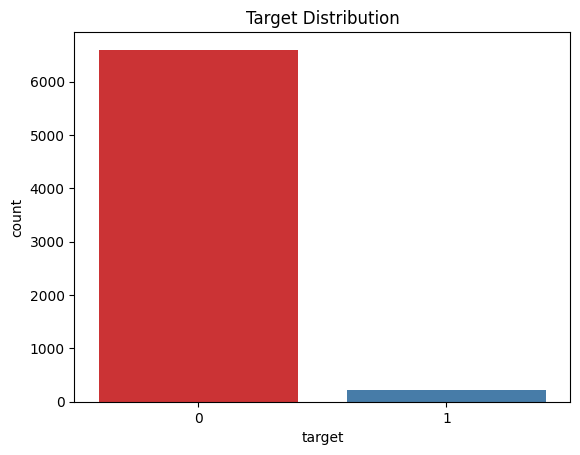

In [22]:
# Creating a count plot to visualize the distribution of the target variable in the training data
sns.countplot(x='target', data=df, palette='Set1')

# Setting the title of the plot
plt.title('Target Distribution')

# Displaying the plot
plt.show()

In [23]:
# Printing the counts of labels before oversampling
print("Before OverSampling, counts of label '1': {}".format(sum(y == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y == 0)))

# Importing the SMOTE (Synthetic Minority Over-sampling Technique) module from imblearn library
from imblearn.over_sampling import SMOTE

# Instantiating the SMOTE object with a random state for reproducibility
smote = SMOTE(random_state = 2)

# Applying SMOTE to perform oversampling on the features (X) and target (y)
X_over, y_over = smote.fit_resample(X, y)

# Printing the counts of labels after oversampling
print("After OverSampling, counts of label '1': {}".format(sum(y_over == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_over == 0)))


Before OverSampling, counts of label '1': 220
Before OverSampling, counts of label '0': 6599 

After OverSampling, counts of label '1': 6599
After OverSampling, counts of label '0': 6599


In [24]:
# get train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_over, y_over, test_size=0.3, random_state=42)

# get validation set
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [25]:
# apply SelectKBest class to extract top 25 best features
bestFeatures = SelectKBest(score_func=f_classif, k=25)
fit = bestFeatures.fit(X_train, y_train)


dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X_train.columns)

# concat two dataframes for better visualization
featureScores = pd.concat([dfcolumns, dfscores], axis=1)
featureScores.columns = ["Specs", "Score"]

# print 15 best features
featureScores = pd.DataFrame(featureScores.nlargest(25,"Score"))
featureScores

Specs        Score
36                                       Debt ratio %  4324.674718
37                                   Net worth/Assets  4324.674718
0    ROA(C) before interest and depreciation befor...  3795.180719
2    ROA(B) before interest and depreciation after...  3667.579487
1              ROA(A) before interest and % after tax  3419.731328
18            Persistent EPS in the Last Four Seasons  3370.784696
85                         Net Income to Total Assets  3259.750840
42              Net profit before tax/Paid-in capital  3027.966531
22           Per Share Net profit before tax (Yuan ¥)  2864.475958
67                  Retained Earnings to Total Assets  2784.290056
59                        Current Liability to Assets  2452.553526
53                    Working Capital to Total Assets  2375.492084
15                            Net Value Per Share (B)  2314.227849
16                            Net Value Per Share (A)  2306.362625
17                            Net Value Per Share (C)  2279.533357
21                Operating Profit Per Share (Yuan ¥)  1593.711879
41                   Operating profit/Paid-in capital  1577.871839
83                Current Liability to Current Assets  1433.321828
68                         Total income/Total expense  1149.199514
3                              Operating Gross Margin  1080.253773
88                              Gross Profit to Sales  1080.237910
4                         Realized Sales Gross Margin  1069.131673
56                                  Cash/Total Assets  1050.626246
81                                      CFO to Assets   980.530135
14                                       Tax rate (A)   947.841137

In [26]:
# gets the list of important features
importantFeatures = featureScores["Specs"].tolist()

 # filter the columns of X_train, X_test and X_val
X_train = X_train[importantFeatures]
X_test = X_test[importantFeatures]
X_val = X_val[importantFeatures]

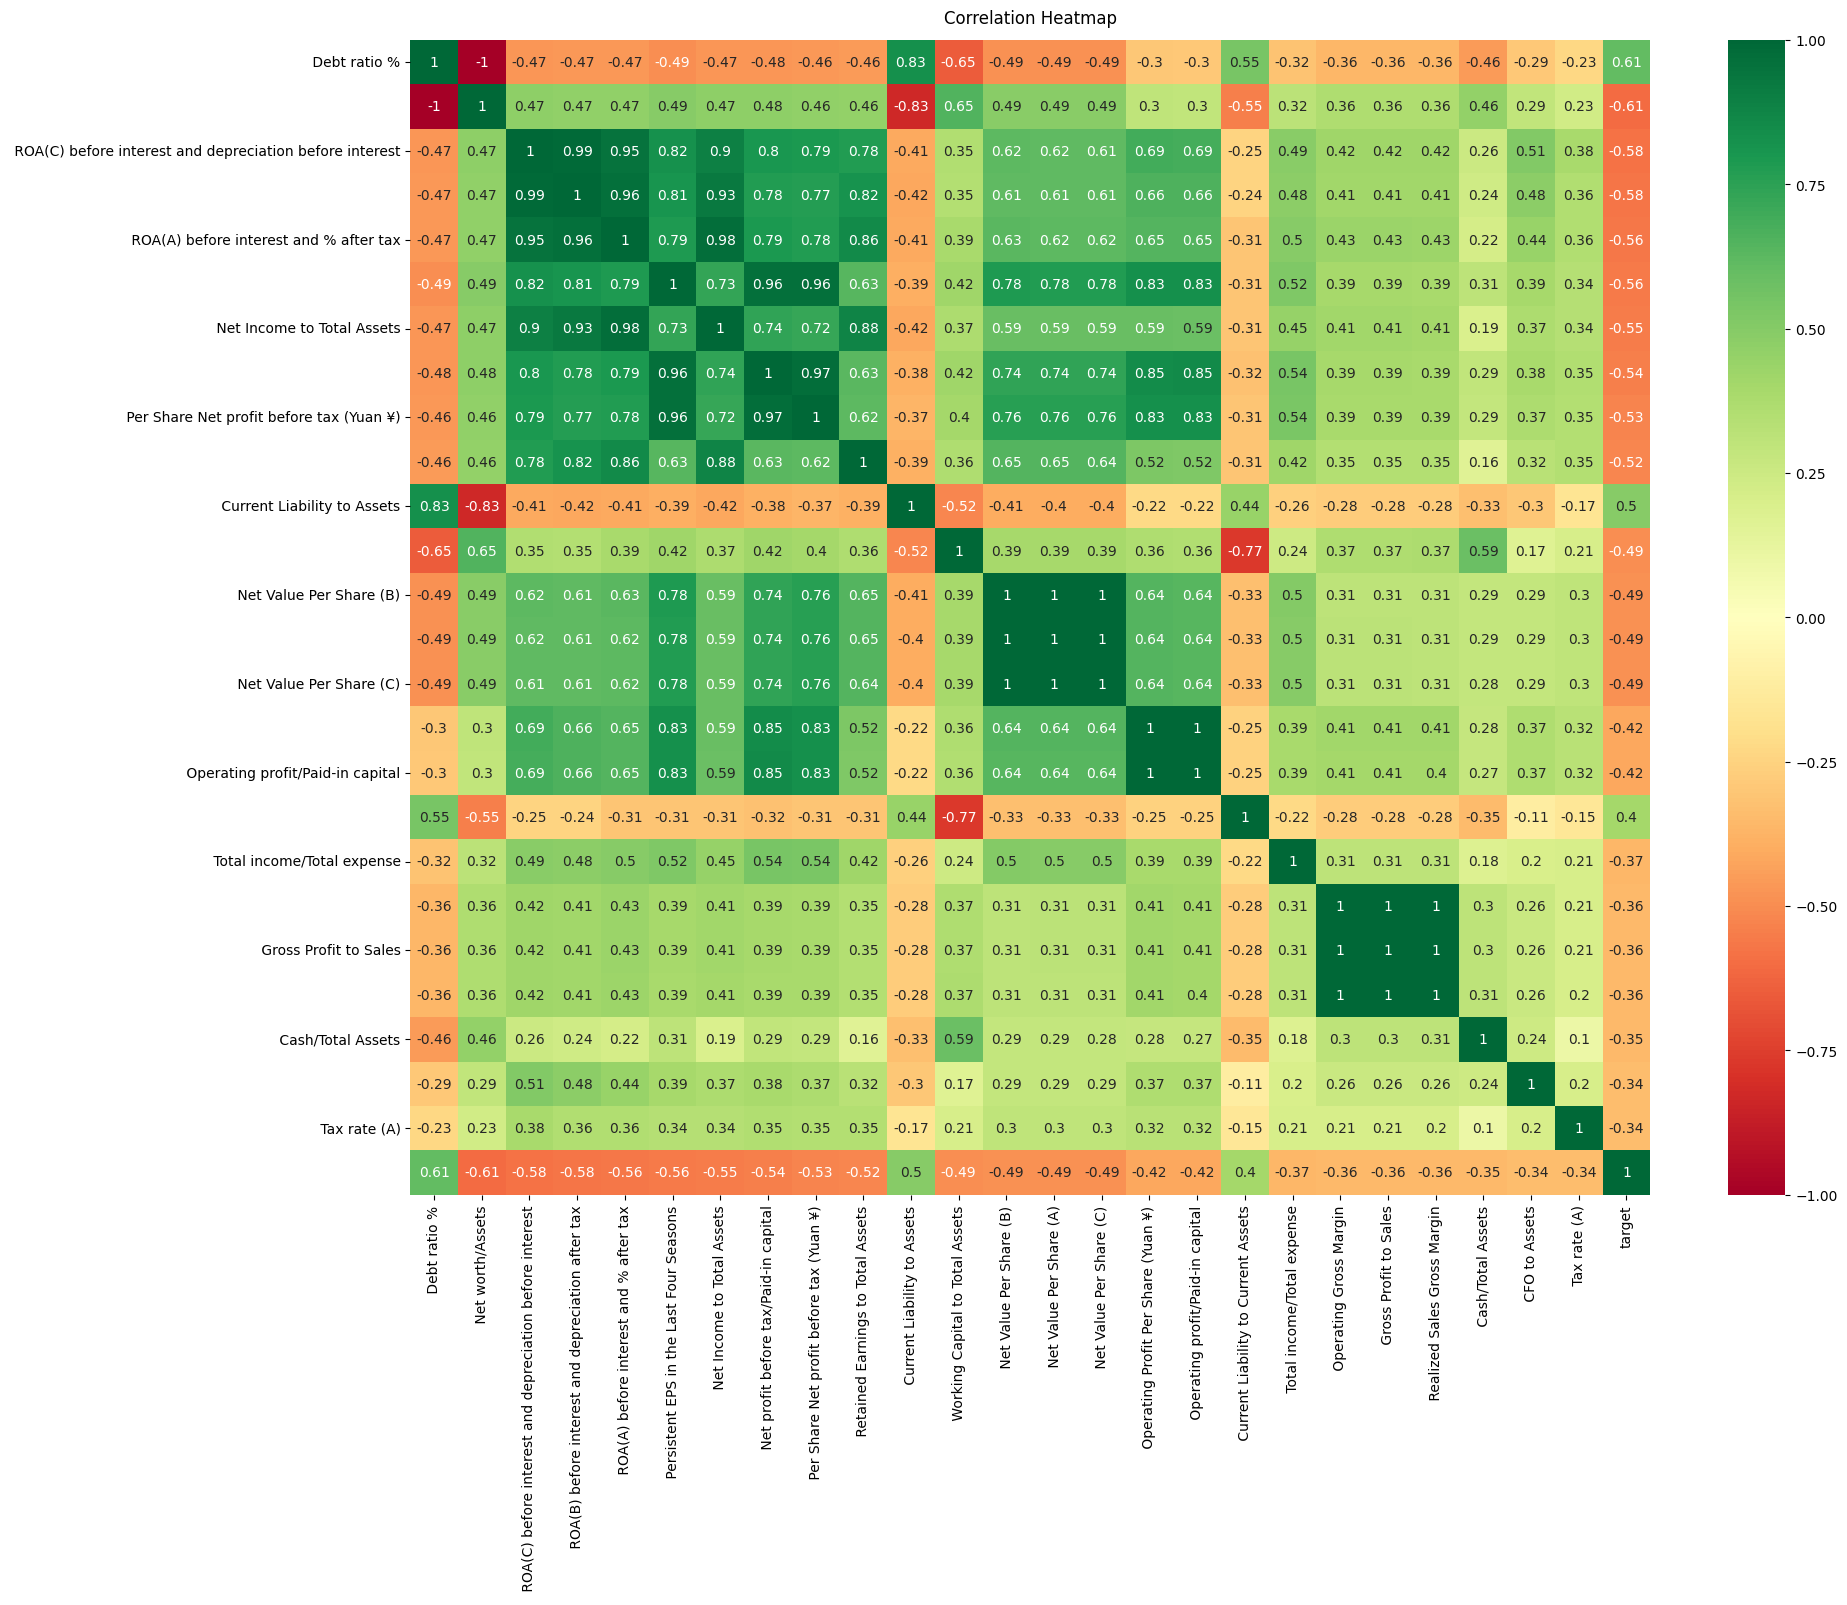

In [27]:
# gets X_train and y_train together
train = pd.concat([X_train, y_train], axis=1)

# get the correlation between the features and the target
corr = train.corr()

# plot the heatmap
heatmap = sns.heatmap(corr, annot=True, cmap="RdYlGn")
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)

# increase heatmap size
fig = plt.gcf()
fig.set_size_inches(20, 15)

plt.show()

In [28]:
# Assuming 'corr' is the correlation matrix and 'featureScores' is a DataFrame containing feature names and scores

# Define a threshold
threshold = 0.85

# Function to remove features with high correlation
def remove_highly_correlated_features(corr_matrix, scores, threshold):
    # Find feature pairs with correlation above threshold
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    to_drop = [column for column in upper.columns if any(upper[column].abs() > threshold)]

    # For each feature to drop, check if there's a feature with a higher score
    for feature in to_drop:
        correlated_features = upper.index[upper[feature].abs() > threshold].tolist()
        scores_filtered = scores[scores['Specs'].isin(correlated_features + [feature])]
        best_feature = scores_filtered.loc[scores_filtered['Score'].idxmax()]['Specs']

        # Only drop if the feature is not the best one
        if feature != best_feature:
            corr_matrix.drop(feature, axis=0, inplace=True)
            corr_matrix.drop(feature, axis=1, inplace=True)

    return corr_matrix

# Remove the features
updated_corr = remove_highly_correlated_features(corr, featureScores, threshold)
updated_corr

Debt ratio %  \
 Debt ratio %                                            1.000000   
 ROA(C) before interest and depreciation before...      -0.474929   
 Persistent EPS in the Last Four Seasons                -0.493602   
 Current Liability to Assets                             0.834572   
 Working Capital to Total Assets                        -0.653026   
 Net Value Per Share (B)                                -0.487750   
 Current Liability to Current Assets                     0.545818   
 Total income/Total expense                             -0.316509   
 Operating Gross Margin                                 -0.364467   
 Cash/Total Assets                                      -0.455463   
 CFO to Assets                                          -0.290805   
 Tax rate (A)                                           -0.231822   
target                                                   0.607643   

                                                     ROA(C) before interest and depreciation before interest  \
 Debt ratio %                                                                               -0.474929          
 ROA(C) before interest and depreciation before...                                           1.000000          
 Persistent EPS in the Last Four Seasons                                                     0.823675          
 Current Liability to Assets                                                                -0.413745          
 Working Capital to Total Assets                                                             0.354681          
 Net Value Per Share (B)                                                                     0.617554          
 Current Liability to Current Assets                                                        -0.247260          
 Total income/Total expense                                                                  0.487739          
 Operating Gross Margin                                                                      0.421130          
 Cash/Total Assets                                                                           0.257653          
 CFO to Assets                                                                               0.508680          
 Tax rate (A)                                                                                0.384031          
target                                                                                      -0.582550          

                                                     Persistent EPS in the Last Four Seasons  \
 Debt ratio %                                                                      -0.493602   
 ROA(C) before interest and depreciation before...                                  0.823675   
 Persistent EPS in the Last Four Seasons                                            1.000000   
 Current Liability to Assets                                                       -0.394582   
 Working Capital to Total Assets                                                    0.418469   
 Net Value Per Share (B)                                                            0.781336   
 Current Liability to Current Assets                                               -0.311398   
 Total income/Total expense                                                         0.520528   
 Operating Gross Margin                                                             0.392790   
 Cash/Total Assets                                                                  0.305362   
 CFO to Assets                                                                      0.392939   
 Tax rate (A)                                                                       0.337421   
target                                                                             -0.559737   

                                                     Current Liability to Assets  \
 Debt ratio %                                                           0.834572   
 ROA

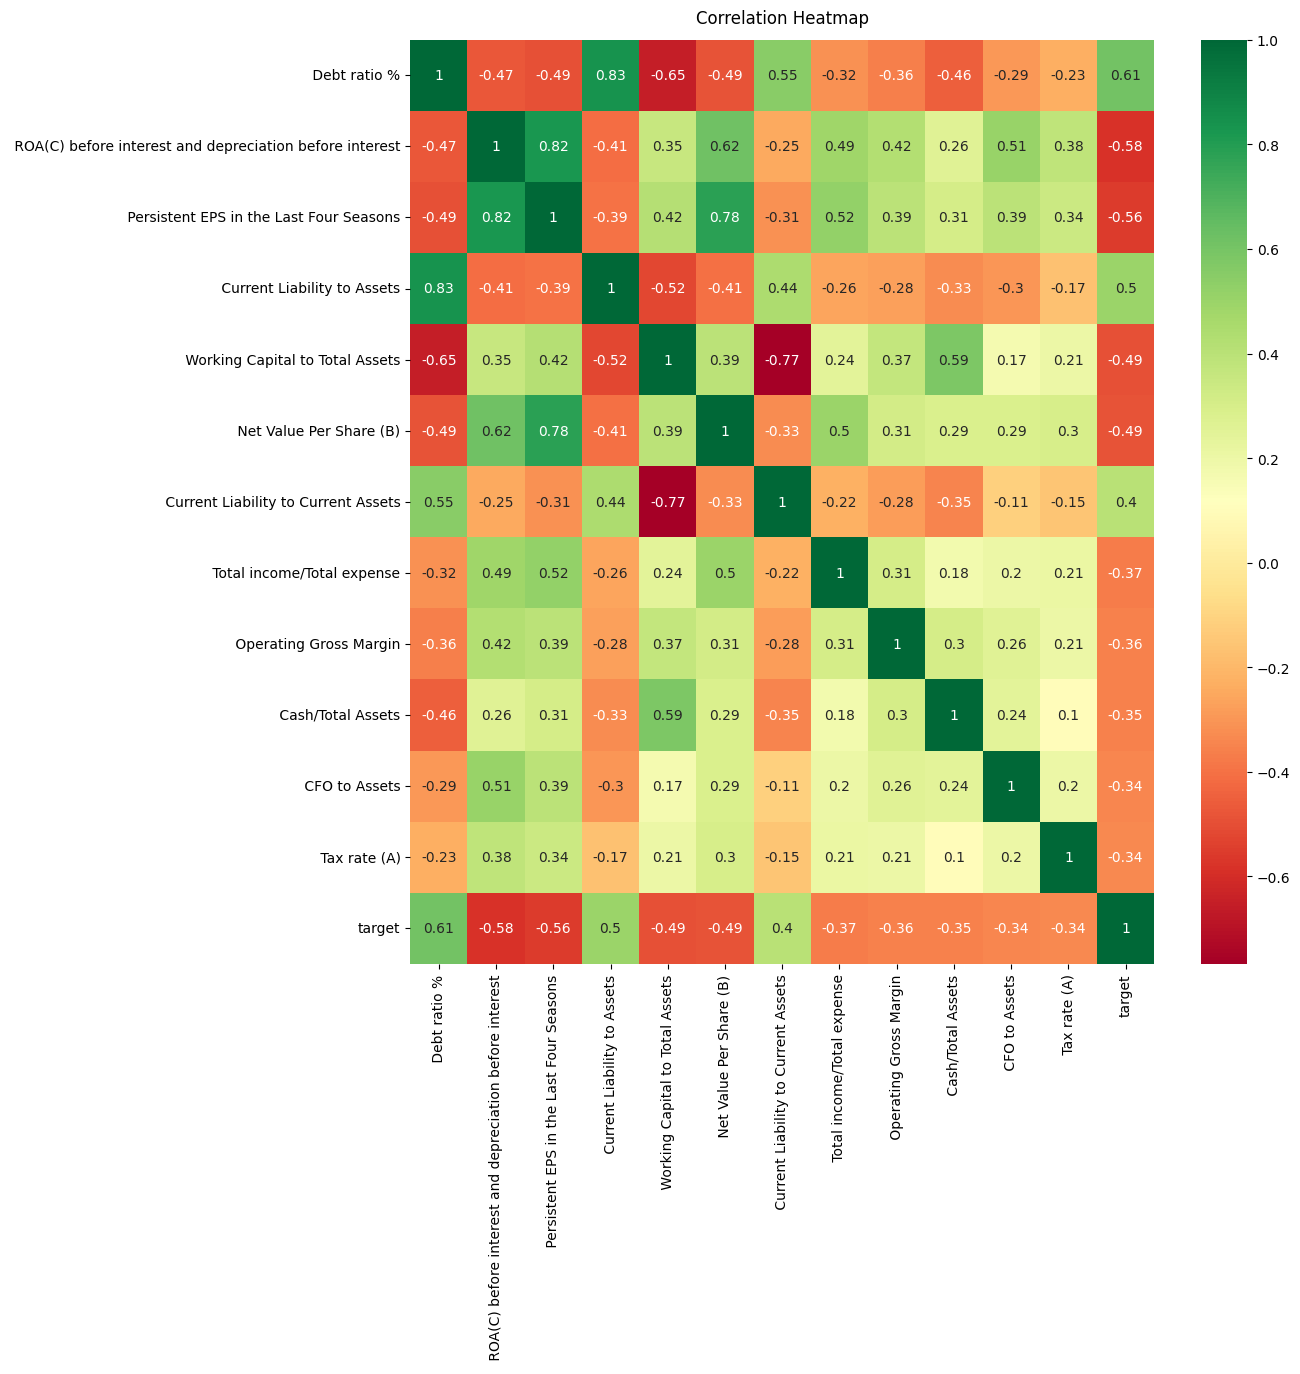

In [29]:
heatmap = sns.heatmap(updated_corr, annot=True, cmap="RdYlGn")
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)

# increase heatmap size
fig = plt.gcf()
fig.set_size_inches(12, 12)

plt.show()

In [30]:
# Removing the 'target' column from the updated correlation matrix
updated_corr = updated_corr.drop(columns=['target'])

# Filtering the columns of X_train, X_test, and X_val based on the columns of the updated correlation matrix
X_train = X_train[updated_corr.columns]
X_test = X_test[updated_corr.columns]
X_val = X_val[updated_corr.columns]

# Concatenating X_train and y_train to recreate the train DataFrame
train = pd.concat([X_train, y_train], axis=1)


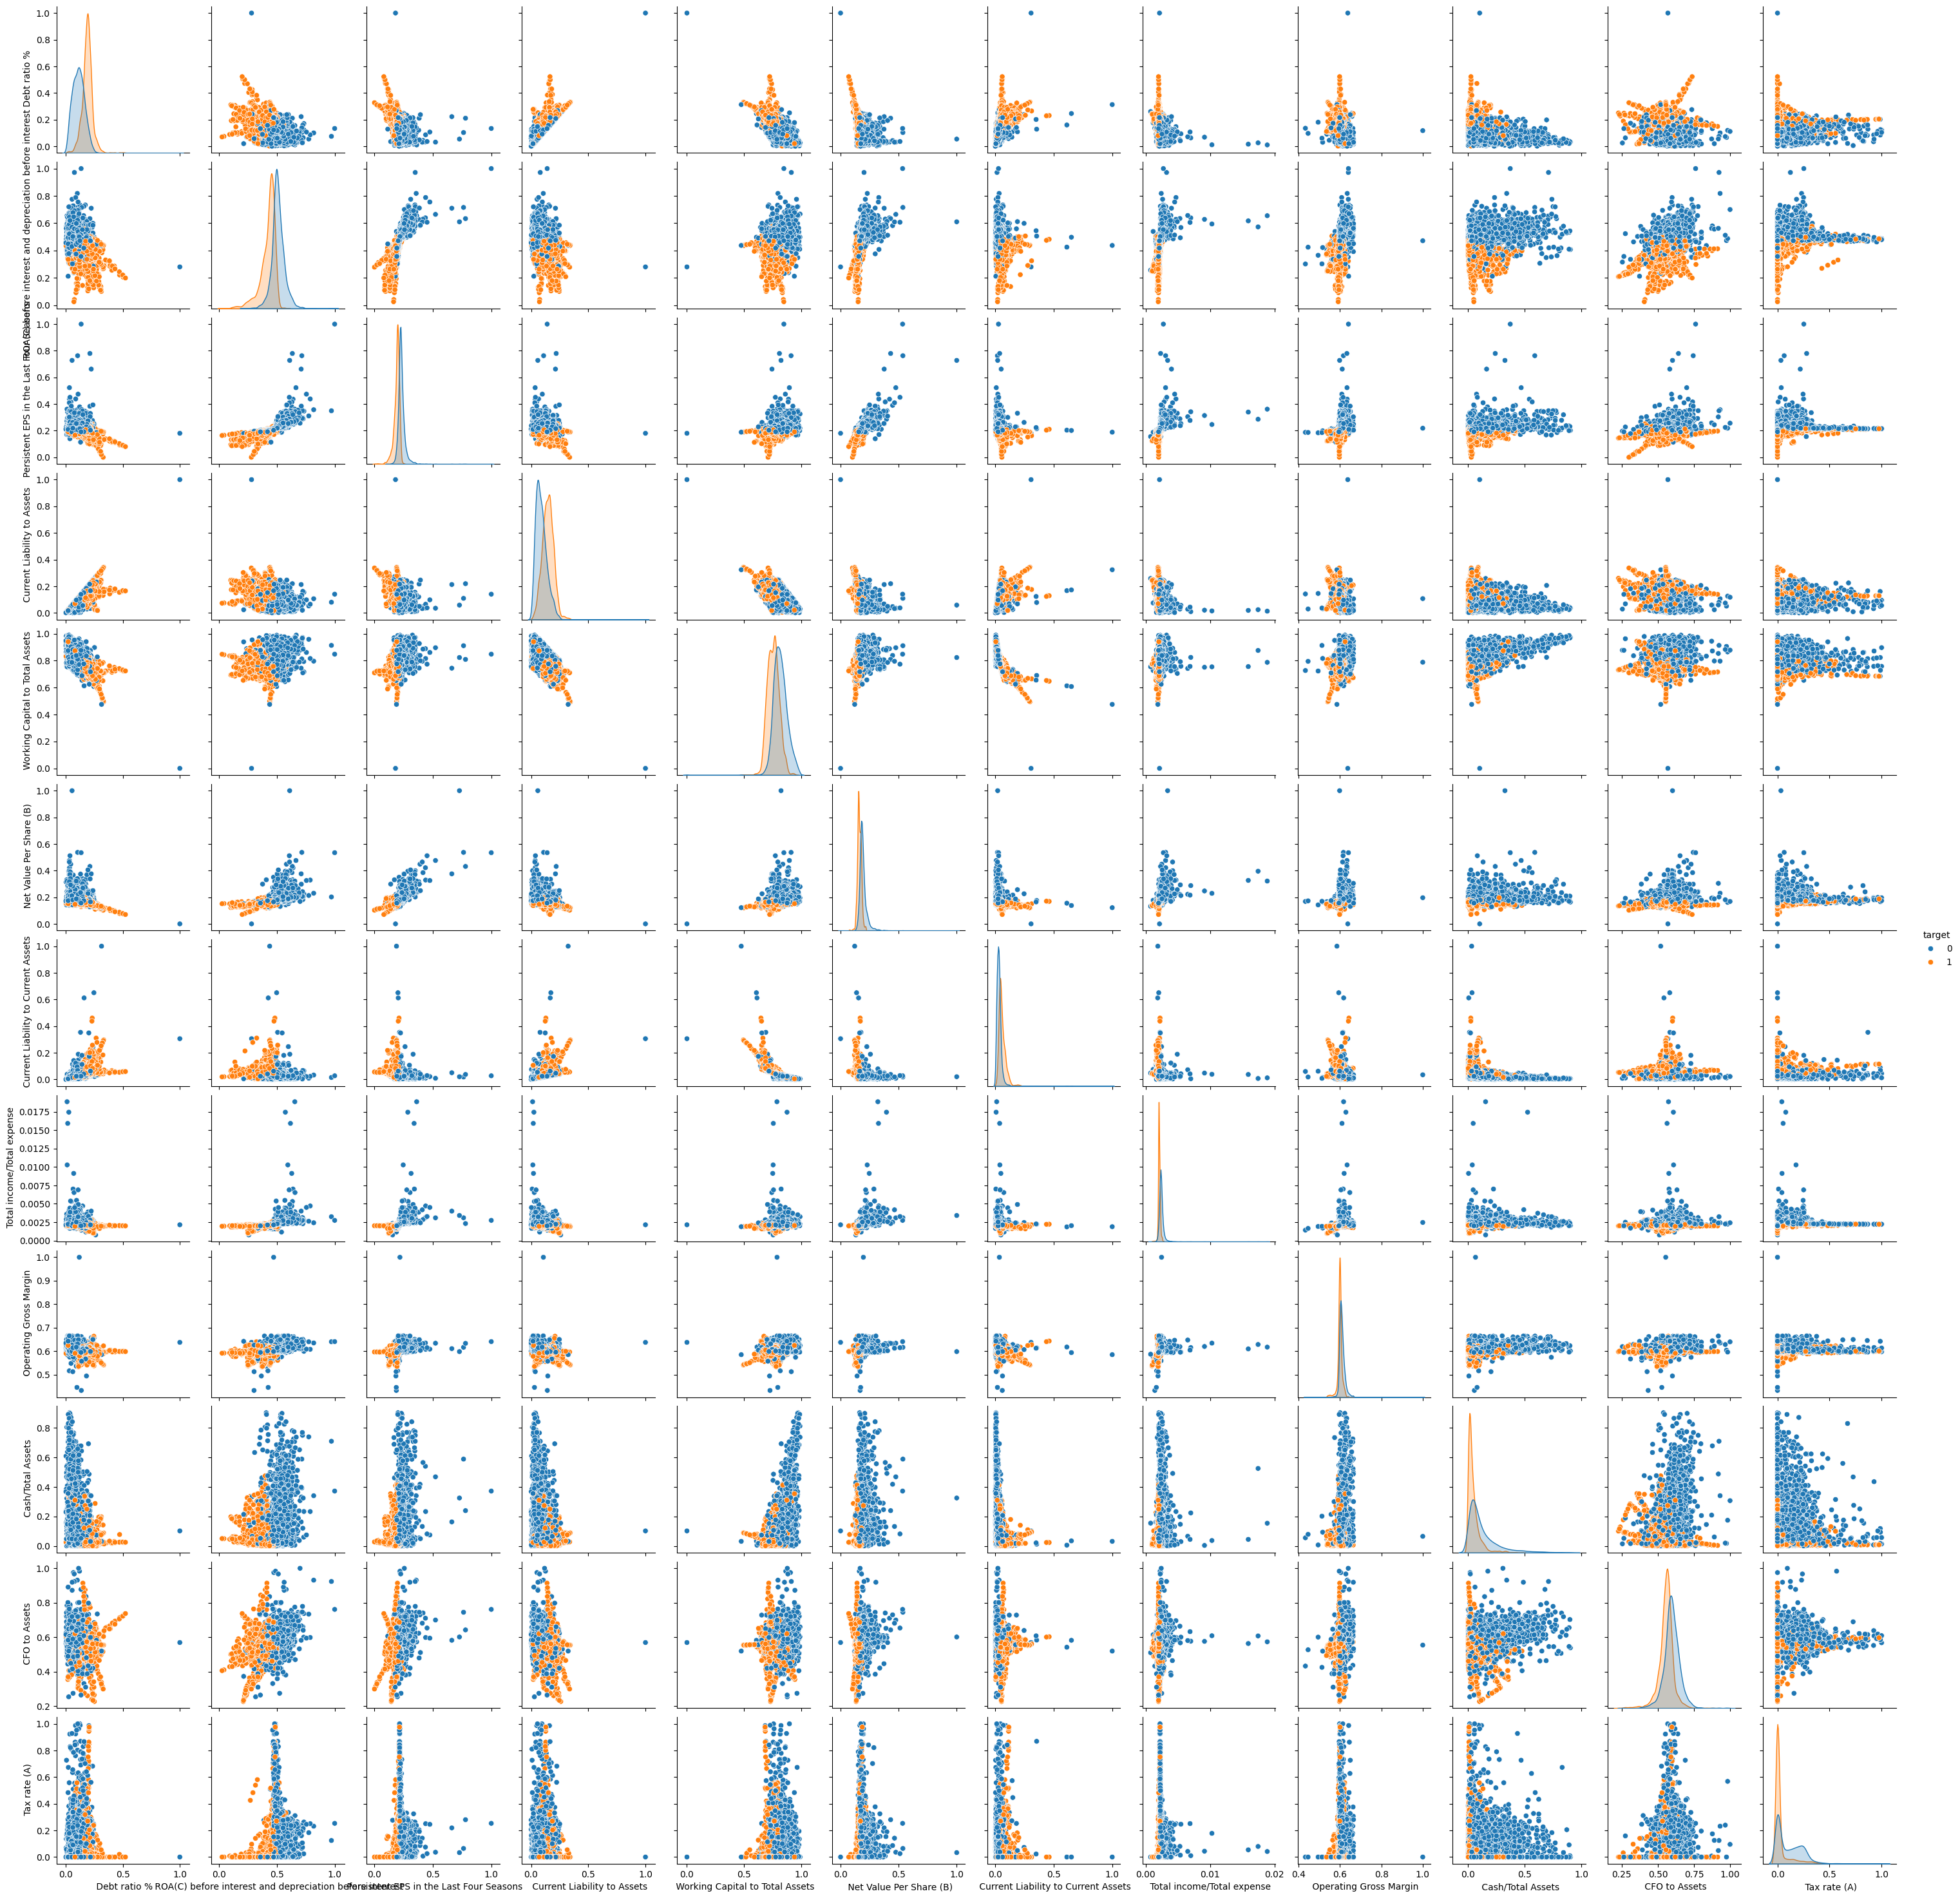

In [31]:
# Plotting pairwise relationships in the dataset using seaborn's pairplot
# 'hue' parameter specifies the variable used for coloring the plot, in this case, 'target'
sns.pairplot(train, hue='target')

# Displaying the plot
plt.show()


#MODELS FOR CLASSIFICATION

In [32]:
# Dictionary 'models' containing information about different machine learning models
models = {
    "DecisionTree": {
        "train": {
            "X": X_train.to_numpy(),  # Features of the training set converted to a NumPy array
            "y": y_train.to_numpy()   # Target variable of the training set converted to a NumPy array
        }
    },
    "Random Forest": {
        "train": {
            "X": X_train.to_numpy(),  # Features of the training set converted to a NumPy array
            "y": y_train.to_numpy()   # Target variable of the training set converted to a NumPy array
        }
    },
    "LogReg": {
        "train": {
            "X": X_train.to_numpy(),  # Features of the training set converted to a NumPy array
            "y": y_train.to_numpy()   # Target variable of the training set converted to a NumPy array
        }
    },
    "NB": {
        "train": {
            "X": X_train.to_numpy(),  # Features of the training set converted to a NumPy array
            "y": y_train.to_numpy()   # Target variable of the training set converted to a NumPy array
        }
    },
    "SVM": {
        "train": {
            "X": X_train.to_numpy(),  # Features of the training set converted to a NumPy array
            "y": y_train.to_numpy()   # Target variable of the training set converted to a NumPy array
        }
    },
    "XGBoost": {
        "train": {
            "X": X_train.to_numpy(),  # Features of the training set converted to a NumPy array
            "y": y_train.to_numpy()   # Target variable of the training set converted to a NumPy array
        }
    },
}


In [33]:
def classification_pipeline():
    for model in models.keys():
        if(model == "DecisionTree"):
            dt = DecisionTreeClassifier(random_state=8)
            dt.fit(models[model]["train"]["X"], models[model]["train"]["y"])
            y_pred = dt.predict(X_test)

            split_index = [-1] * len(models[model]["train"]["X"]) + [0] * len(X_val)
            X = np.concatenate((models[model]["train"]["X"], X_val), axis=0)
            y = np.concatenate((models[model]["train"]["y"], y_val), axis=0)

            pds = PredefinedSplit(test_fold=split_index)

            param_bayes = {'criterion':['gini','entropy'], 'max_features':["sqrt", "log2"], 'max_depth':[4,5,6,7,8,9,10]}

            clf = BayesSearchCV(estimator=dt,
                                search_spaces=param_bayes,
                                cv=pds,
                                n_iter=50,
                                scoring="f1",
                                n_jobs=-1)

            clf.fit(X, y)

            tuned_model = DecisionTreeClassifier(criterion=clf.best_params_["criterion"],
                                                 max_features=clf.best_params_["max_features"],
                                                 max_depth=clf.best_params_["max_depth"])

            tuned_model.fit(models[model]["train"]["X"], models[model]["train"]["y"])
            y_pred_tuned = tuned_model.predict(X_test)
            print(model,"Tuned")

        elif(model == "Random Forest"):
            rf = RandomForestClassifier()
            rf.fit(models[model]["train"]["X"], models[model]["train"]["y"])
            y_pred = rf.predict(X_test)

            split_index = [-1] * len(models[model]["train"]["X"]) + [0] * len(X_val)
            X = np.concatenate((models[model]["train"]["X"], X_val), axis=0)
            y = np.concatenate((models[model]["train"]["y"], y_val), axis=0)

            pds = PredefinedSplit(test_fold=split_index)

            param_bayes = {'criterion':['gini','entropy'], 'n_estimators':[408, 608],'max_features':["auto", "sqrt", "log2"], 'max_depth':[600, 700]}

            clf = BayesSearchCV(estimator=rf,
                                search_spaces=param_bayes,
                                cv=pds,
                                n_iter=50,
                                scoring="f1",
                                n_jobs=-1)

            clf.fit(X, y)

            tuned_model = RandomForestClassifier(n_estimators=(clf.best_params_["n_estimators"]),
                                                 criterion=clf.best_params_["criterion"],
                                                 max_features=clf.best_params_["max_features"],
                                                 max_depth=(clf.best_params_["max_depth"]))

            tuned_model.fit(models[model]["train"]["X"], models[model]["train"]["y"])
            y_pred_tuned = tuned_model.predict(X_test)
            print(model,"Tuned")

        elif model in ["LogReg"]:
            logreg = LogisticRegression()
            logreg.fit(models[model]["train"]["X"], models[model]["train"]["y"])
            y_pred = logreg.predict(X_test)

            split_index = [-1] * len(models[model]["train"]["X"]) + [0] * len(X_val)
            X = np.concatenate((models[model]["train"]["X"], X_val), axis=0)
            y = np.concatenate((models[model]["train"]["y"], y_val), axis=0)

            pds = PredefinedSplit(test_fold=split_index)

            param_bayes_logreg = {"penalty": ["l2"],
                                  "C": Real(0.01, 100, 'log-uniform'),
                                  "solver": ["liblinear", "newton-cg"]}

            clf = BayesSearchCV(estimator=logreg,
                                search_spaces=param_bayes_logreg,
                                cv=pds,
                                n_iter=50,
                                scoring="f1")

            clf.fit(X, y)

            tuned_model = LogisticRegression(C=clf.best_params_["C"],
                                             penalty=clf.best_params_["penalty"],
                                             solver=clf.best_params_["solver"])

            tuned_model.fit(models[model]["train"]["X"], models[model]["train"]["y"])
            y_pred_tuned = tuned_model.predict(X_test)
            print(model,"Tuned")

        elif model in ["NB"]:
            # Fitting
            gnb = GaussianNB()
            gnb.fit(models[model]["train"]["X"], models[model]["train"]["y"])
            y_pred = gnb.predict(X_test)

            tuned_model = GaussianNB()

            tuned_model.fit(models[model]["train"]["X"], models[model]["train"]["y"])
            y_pred_tuned = tuned_model.predict(X_test)
            print(model,"Tuned")

        elif model in ["SVM"]:
            # Fitting
            svc = SVC(probability=True)
            svc.fit(models[model]["train"]["X"], models[model]["train"]["y"])
            y_pred = svc.predict(X_test)

            split_index = [-1] * len(models[model]["train"]["X"]) + [0] * len(X_val)
            X = np.concatenate((models[model]["train"]["X"], X_val), axis=0)
            y = np.concatenate((models[model]["train"]["y"], y_val), axis=0)

            pds = PredefinedSplit(test_fold=split_index)

            param_bayes_svc = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf', 'poly', 'sigmoid']}

            clf = BayesSearchCV(estimator=SVC(),
                                search_spaces=param_bayes_svc,
                                cv=pds,
                                n_iter=50,
                                scoring="f1",
                                n_jobs=-1)

            clf.fit(X, y)

            tuned_model = SVC(C=clf.best_params_["C"],
                             gamma=clf.best_params_["gamma"],
                             kernel=clf.best_params_["kernel"], probability=True)

            tuned_model.fit(models[model]["train"]["X"], models[model]["train"]["y"])
            y_pred_tuned = tuned_model.predict(X_test)
            print(model,"Tuned")


        elif model in ["XGBoost"]:
            xgb_model = xgb.XGBClassifier()

            xgb_model.fit(models[model]["train"]["X"], models[model]["train"]["y"])
            y_pred = xgb_model.predict(X_test)

            split_index = [-1] * len(models[model]["train"]["X"]) + [0] * len(X_val)
            X = np.concatenate((models[model]["train"]["X"], X_val), axis=0)
            y = np.concatenate((models[model]["train"]["y"], y_val), axis=0)

            pds = PredefinedSplit(test_fold=split_index)

            param_bayes_xgb = {'learning_rate': Real(0.001, 0.1, 'log-uniform'),
                               'n_estimators': Integer(100, 300),
                               'max_depth': Integer(3, 7),
                               'subsample': Real(0.8, 1.0, 'uniform'),
                               'colsample_bytree': Real(0.8, 1.0, 'uniform')}

            clf = BayesSearchCV(estimator=xgb_model,
                                search_spaces=param_bayes_xgb,
                                cv=pds,
                                n_iter=50,
                                scoring='f1',
                                n_jobs=-1)

            clf.fit(X, y)

            best_params = clf.best_params_

            # Train the final model with the best parameters using the entire training set
            tuned_model = xgb.XGBClassifier(**best_params)
            tuned_model.fit(models[model]["train"]["X"], models[model]["train"]["y"])

            # Evaluate the final model on the test set
            y_pred_tuned = tuned_model.predict(X_test)
            print(model,"Tuned")

        models[model]["tuned model"] = tuned_model
        models[model]["accuracy"] = accuracy_score(y_test, y_pred)
        models[model]["tuned_accuracy"] = accuracy_score(y_test, y_pred_tuned)
        models[model]["precision"] = precision_score(y_test, y_pred)
        models[model]["tuned_precision"] = precision_score(y_test, y_pred_tuned)
        models[model]["recall"] = recall_score(y_test, y_pred)
        models[model]["tuned_recall"] = recall_score(y_test, y_pred_tuned)
        models[model]["f1"] = f1_score(y_test, y_pred)
        models[model]["tuned_f1"] = f1_score(y_test, y_pred_tuned)
        models[model]["auc"] = roc_auc_score(y_test, y_pred)
        models[model]["tuned_auc"] = roc_auc_score(y_test, y_pred_tuned)
        models[model]["confusion_matrix"] = confusion_matrix(y_test, y_pred)
        models[model]["tuned_confusion_matrix"] = confusion_matrix(y_test, y_pred_tuned)

#TRAINING & TESTING

In [34]:
classification_pipeline()

DecisionTree Tuned
Random Forest Tuned
LogReg Tuned
NB Tuned
SVM Tuned
XGBoost Tuned


In [39]:
model_df = pd.DataFrame(models)
model_df = model_df.T.drop(columns=['train'])
model_df.to_csv('output.csv')
model_df

tuned model  accuracy  \
DecisionTree   DecisionTreeClassifier(criterion='entropy', ma...  0.917424   
Random Forest  (DecisionTreeClassifier(max_depth=699, max_fea...  0.954293   
LogReg         LogisticRegression(C=11.648386037794124, solve...  0.886364   
NB                                                  GaussianNB()  0.869192   
SVM            SVC(C=100, gamma=1, kernel='poly', probability...  0.892172   
XGBoost        XGBClassifier(base_score=None, booster=None, c...  0.957576   

              tuned_accuracy precision tuned_precision    recall tuned_recall  \
DecisionTree        0.901515  0.906203        0.886542  0.929735     0.919043   
Random Forest       0.952525  0.931301        0.928986  0.980143     0.979124   
LogReg              0.887879  0.864995        0.874016  0.913442     0.904277   
NB                  0.869192  0.828636        0.828636  0.928208     0.928208   
SVM                 0.903788  0.870005        0.880712  0.920061     0.932281   
XGBoost             0.959343  0.936346        0.935718  0.981161     0.985743   

                     f1  tuned_f1       auc tuned_auc  \
DecisionTree   0.917819    0.9025  0.917523  0.901656   
Random Forest  0.955098  0.953396    0.9545  0.952738   
LogReg         0.888559  0.888889  0.886581   0.88801   
NB               0.8756    0.8756  0.869665  0.869665   
SVM            0.894333  0.905763  0.892395  0.904016   
XGBoost         0.95823  0.960079  0.957765  0.959555   

                         confusion_matrix      tuned_confusion_matrix  
DecisionTree   [[1807, 189], [138, 1826]]  [[1765, 231], [159, 1805]]  
Random Forest   [[1854, 142], [39, 1925]]   [[1849, 147], [41, 1923]]  
LogReg         [[1716, 280], [170, 1794]]  [[1740, 256], [188, 1776]]  
NB             [[1619, 377], [141, 1823]]  [[1619, 377], [141, 1823]]  
SVM            [[1726, 270], [157, 1807]]  [[1748, 248], [133, 1831]]  
XGBoost         [[1865, 131], [37, 1927]]   [[1863, 133], [28, 1936]]

#ENSEMBLE CLASSIFICATION

In [36]:
from sklearn.ensemble import VotingClassifier
from sklearn.base import clone

# Create a list of tuples where each tuple contains the model name and the corresponding tuned model
models_to_ensemble_us = [
    ("DecisionTree", model_df["tuned model"]["DecisionTree"]),
    ("RandomForest", model_df["tuned model"]["Random Forest"]),
    ("LogReg", model_df["tuned model"]["LogReg"]),
    ("NB", model_df["tuned model"]["NB"]),
    ("SVM", model_df["tuned model"]["SVM"]),
    ("XGBoost", model_df["tuned model"]["XGBoost"])
]

# Create a VotingClassifier using soft voting
ensemble_model = VotingClassifier(estimators=models_to_ensemble_us, voting='soft')

# Fit the ensemble model on the training data
ensemble_model.fit(X_train, y_train)

# Make predictions using the ensemble model
y_pred_ensemble = ensemble_model.predict(X_test)

# Calculate performance metrics for the ensemble model
ensemble_accuracy = accuracy_score(y_test, y_pred_ensemble)
ensemble_precision = precision_score(y_test, y_pred_ensemble)
ensemble_recall = recall_score(y_test, y_pred_ensemble)
ensemble_f1 = f1_score(y_test, y_pred_ensemble)
ensemble_auc = roc_auc_score(y_test, y_pred_ensemble)
ensemble_confusion_matrix = confusion_matrix(y_test, y_pred_ensemble)

# Print or store the metrics for the ensemble model
print("Ensemble Model Metrics Unbalanced:")
print(f"Accuracy: {ensemble_accuracy}")
print(f"Precision: {ensemble_precision}")
print(f"Recall: {ensemble_recall}")
print(f"F1 Score: {ensemble_f1}")
print(f"AUC-ROC: {ensemble_auc}")
print(f"Confusion Matrix:\n{ensemble_confusion_matrix}")

Ensemble Model Metrics Unbalanced:
Accuracy: 0.9353535353535354
Precision: 0.9039735099337748
Recall: 0.9730142566191446
F1 Score: 0.9372241294752329
AUC-ROC: 0.9356554249027587
Confusion Matrix:
[[1793  203]
 [  53 1911]]
